In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

pd.set_option("display.max_rows",6)

%matplotlib inline

In [98]:
df_train_data = pd.read_csv('varsom_train_data.csv', index_col=0)
df_test_data = pd.read_csv('varsom_test_data.csv', index_col=0)

df_train_target = pd.read_csv('varsom_train_target.csv', index_col=0)
df_test_target = pd.read_csv('varsom_test_target.csv', index_col=0)

In [99]:
df_train_data

,AvalancheProblems_0_AvalCauseId,AvalancheProblems_0_AvalProbabilityId,AvalancheProblems_0_AvalPropagationId,AvalancheProblems_0_AvalTriggerSimpleId,AvalancheProblems_0_AvalancheExtId,AvalancheProblems_0_AvalancheProblemId,AvalancheProblems_0_AvalancheProblemTypeId,AvalancheProblems_0_AvalancheTypeId,AvalancheProblems_0_DestructiveSizeExtId,ValidFrom,ValidTo,Rainfall_Most_exposed_area,Rainfall_Average,Wind_Speed,Wind_Direction,Temperature_masl
index,,,,,,,,,,,,,,,,
301,13,3,2,10,20,1,30,10,3,2018-03-30T00:00:00,2018-03-30T23:59:59,0,0,2,0,1400
240,10,3,2,21,20,1,7,10,3,2018-01-28T00:00:00,2018-01-28T23:59:59,30,15,5,4,1400
98,11,3,2,21,20,1,30,10,2,2018-03-09T00:00:00,2018-03-09T23:59:59,8,2,4,7,1400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,24,3,2,22,15,1,5,20,2,2018-05-04T00:00:00,2018-05-04T23:59:59,6,4,5,6,1400
12,10,3,2,21,20,1,7,10,2,2017-12-13T00:00:00,2017-12-13T23:59:59,15,2,6,7,1400
31,15,3,2,10,20,1,10,10,2,2018-01-01T00:00:00,2018-01-01T23:59:59,3,1,4,6,1400


In [100]:
df_train_data.columns.values

array(['AvalancheProblems_0_AvalCauseId',
       'AvalancheProblems_0_AvalProbabilityId',
       'AvalancheProblems_0_AvalPropagationId',
       'AvalancheProblems_0_AvalTriggerSimpleId',
       'AvalancheProblems_0_AvalancheExtId',
       'AvalancheProblems_0_AvalancheProblemId',
       'AvalancheProblems_0_AvalancheProblemTypeId',
       'AvalancheProblems_0_AvalancheTypeId',
       'AvalancheProblems_0_DestructiveSizeExtId', 'ValidFrom', 'ValidTo',
       'Rainfall_Most_exposed_area', 'Rainfall_Average', 'Wind_Speed',
       'Wind_Direction', 'Temperature_masl'], dtype=object)

In [113]:
#df_train_target.plot(figsize=(16,10))


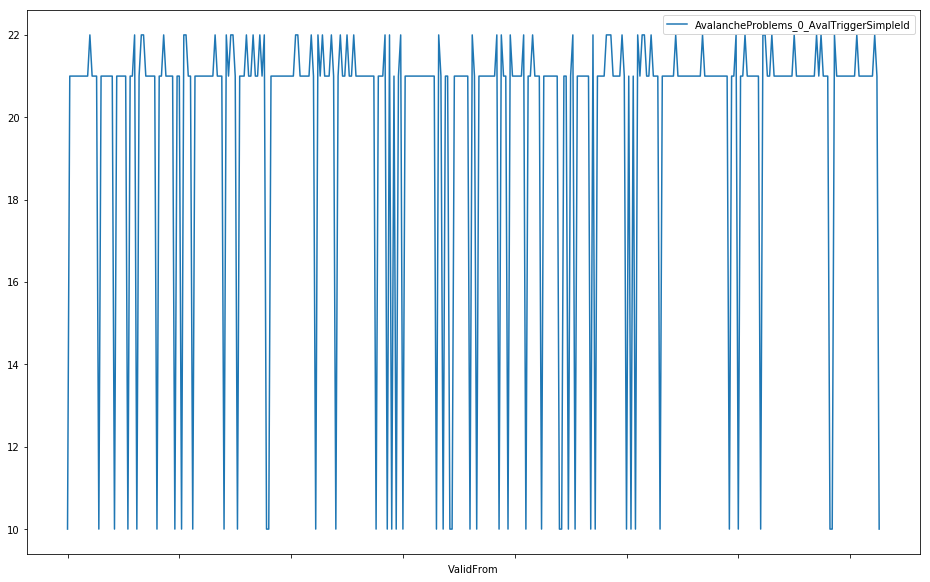

In [103]:
df_train_data.plot(x='ValidFrom', y='AvalancheProblems_0_AvalTriggerSimpleId', figsize=(16,10))
#df_train_data.plot(subplots=True, figsize=(16,20))

In [86]:
#df_train_data = df_train_data.apply(lambda x: x.replace('|', ''))
#df_train_target = df_train_target.apply(lambda x: x.replace('|', ''))

In [104]:
data = np.array(df_train_data.drop(['ValidFrom', 'ValidTo'], axis=1).values, dtype=float)
target = np.array(df_train_target.values, dtype=float)
print(type(data))

<class 'numpy.ndarray'>


In [105]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data, target)

In [106]:
import graphviz 

In [111]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names = df_train_data.columns.values,
                                filled=True, rounded=True, special_characters=True                                
                                )
graph = graphviz.Source(dot_data) 
graph.render("varsom") 

'varsom.pdf'

In [107]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])